# Lab | Cleaning numerical data

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.


### 1. Import the necessary libraries.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df


In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


### 3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_


In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
display(customer_df.info)
display(customer_df.shape)

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

(9134, 24)

In [5]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
customer_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)


In [7]:
# customer_df.columns = customer_df.str.lower().str.replace(" ", "_")
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")

customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 5. Change effective to date column to datetime format.


In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.


In [9]:
_numerical_df_ = customer_df.select_dtypes(np.number)
_numerical_df_.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df


In [10]:
unique_values_dict = {}

for column in _numerical_df_.columns:
    unique_values = _numerical_df_[column].unique()
    unique_values_dict[column] = unique_values

# Display unique values in a neat tabular format
for column, values in unique_values_dict.items():
    print(f"Unique values in '{column}':")
    for value in values:
        print(f"  - {value}")
    print()  # Add an empty line for separation

Unique values in 'customer_lifetime_value':
  - 2763.519279
  - 6979.535903
  - 12887.43165
  - 7645.861827
  - 2813.692575
  - 8256.2978
  - 5380.898636
  - 7216.100311
  - 24127.50402
  - 7388.178085
  - 4738.992022
  - 8197.197078
  - 8798.797003
  - 8819.018934
  - 5384.431665
  - 7463.139377
  - 2566.867823
  - 3945.241604
  - 5710.333115
  - 8162.617053
  - 2872.051273
  - 3041.791561
  - 2450.190996
  - 2392.10789
  - 5802.065978
  - 3946.372085
  - 5346.916576
  - 12902.56014
  - 3235.360468
  - 2454.58354
  - 18975.45611
  - 4715.321344
  - 5018.885233
  - 4932.916345
  - 5744.229745
  - 13891.73567
  - 7380.976717
  - 3090.034104
  - 2521.633095
  - 2652.061785
  - 2771.045031
  - 3939.00637
  - 12231.87968
  - 2443.665166
  - 12819.10289
  - 4468.510542
  - 5514.344018
  - 3343.875326
  - 2294.478927
  - 36707.42639
  - 33473.34946
  - 7983.431709
  - 4854.745666
  - 4293.997319
  - 7164.395543
  - 7619.5158
  - 3958.002823
  - 4499.493252
  - 4059.567414
  - 4458.113369
  -

In [11]:
num_counts = {}

for column in  _numerical_df_.columns:
    # Count the occurrences of each unique value in the column
    num_counts[column] =  _numerical_df_[column].value_counts()

# Display the category counts in a neat tabular format
for column, counts in num_counts.items():
    print(f"Category counts in '{column}':")
    print(counts)
    print()  # Add an empty line for separation

Category counts in 'customer_lifetime_value':
7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

Category counts in 'income':
0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

Category counts in 'monthly_premium_auto':
65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: monthly_premium_auto, Length: 202, dtype: int64

Category counts in 'months_since_last_claim':
3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    2

In [12]:
# I'm not sure about when a numerical variable is continuous or discret. Finnally I decided to put the limit in 15 unique values.
#  If a numerical variable has 15 or fewer unique values, you can consider it as discrete, while if it has more than 15 unique values, you can consider it as continuous. 
# I know this is a simplified approach and may not capture the full complexity of the data.

In [13]:
def continuous_discrete(dataframe):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    
    for column in dataframe.columns:
        if dataframe[column].nunique() > 50:
            continuous_df[column] = dataframe[column]
        else:
            discrete_df[column] = dataframe[column]
    
    return continuous_df, discrete_df

continuous_df, discrete_df = continuous_discrete(_numerical_df_)

In [14]:
# Better method to do the same
# def discrete_continuous(df):
#     discrete_lst = []
#     continuous_lst = []
#     for col in df.columns:
#         if len(df[col].unique()) < (df.shape[0] * 0.02):
#             discrete_lst.append(col)
#         else:
#             continuous_lst.append(col)
#     return (discrete_lst, continuous_lst)
   
# discrete_lst, continuous_lst = discrete_continuous(numerical)

# print('Discrete List:  ',discrete_lst)
# print('Continuous List:   ',continuous_lst)

In [15]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [16]:
discrete_df 

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


### 7. Plot a correlation matrix, comment what you see.


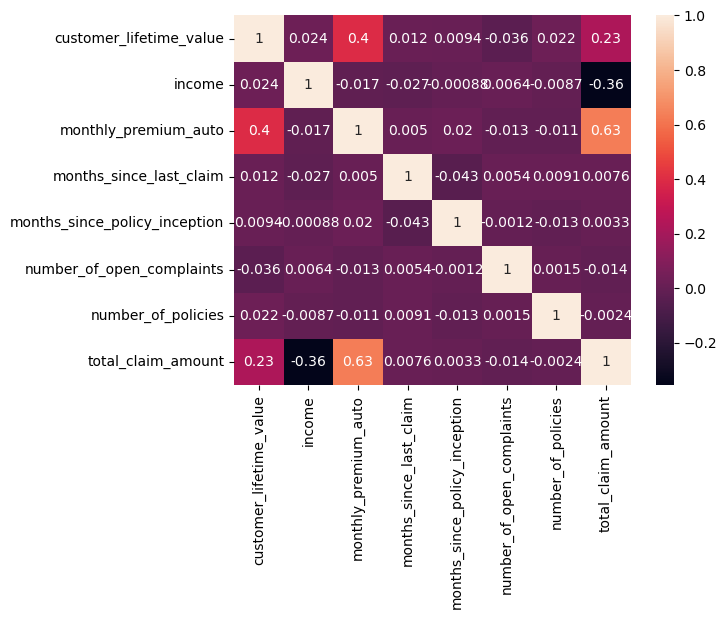

In [17]:
correlations_matrix = _numerical_df_.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [18]:
correlations = _numerical_df_.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


There are correlation between our target and customer_lifetime_value, income (negative) and monthly_premium_auto 

### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)


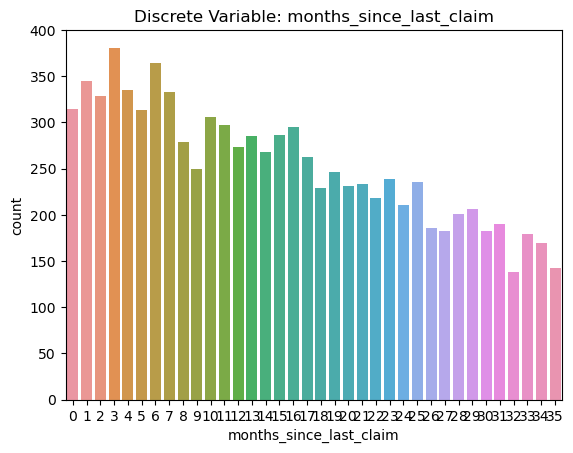

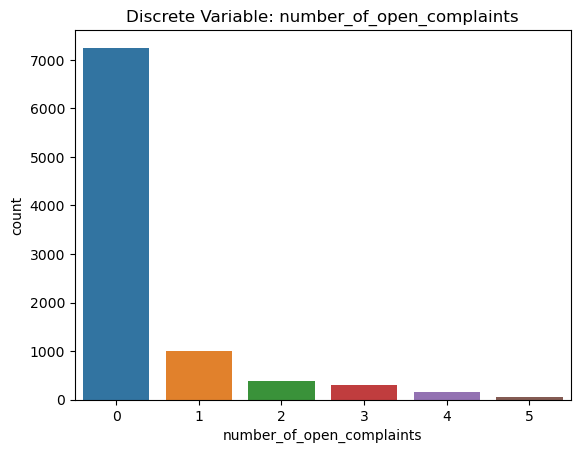

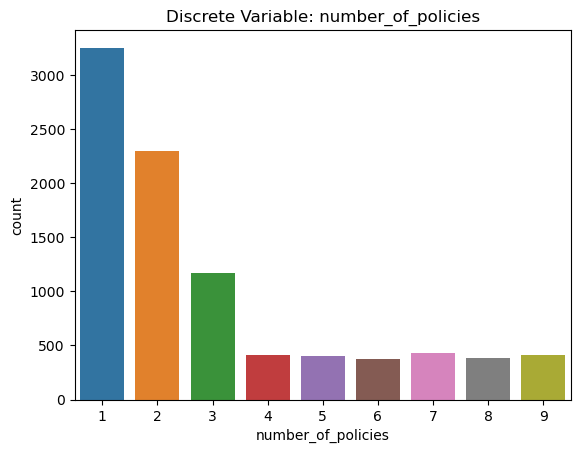

In [19]:
def plot_discrete(dataframe):
    
    for column in discrete_df.columns:
        sns.countplot(data=discrete_df, x=column)
        plt.title(f'Discrete Variable: {column}')
        plt.show()
        
plot_discrete(discrete_df)  

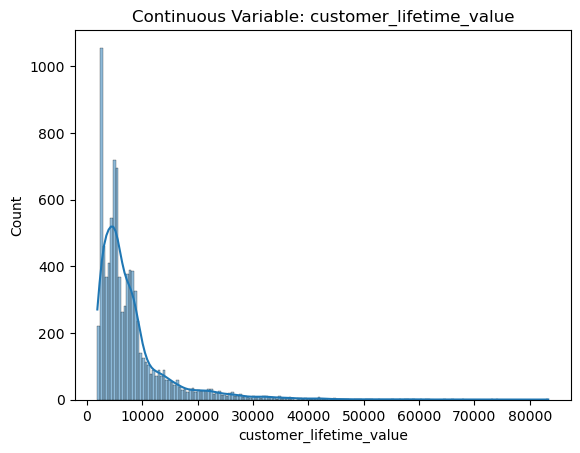

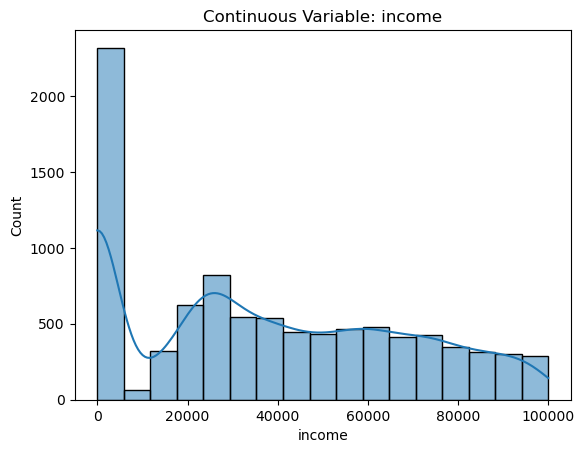

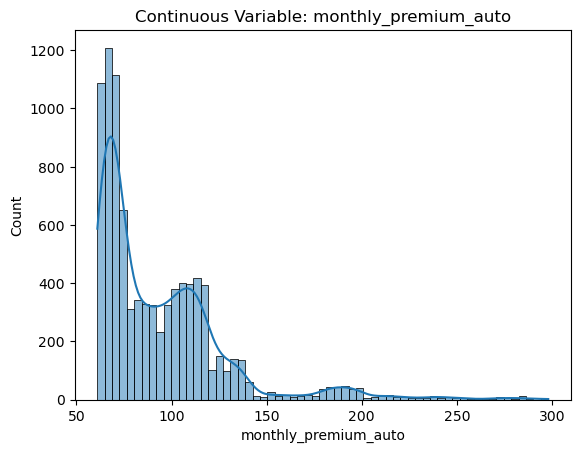

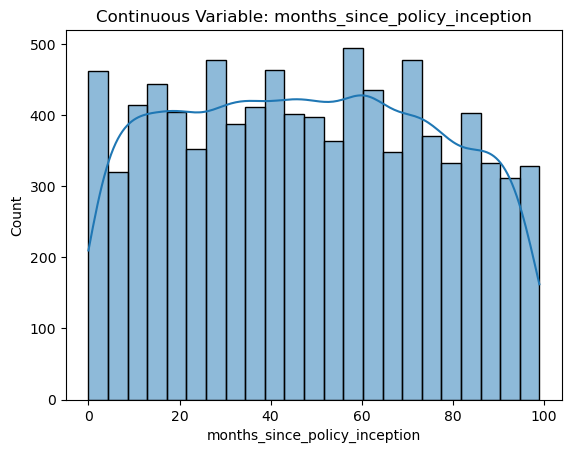

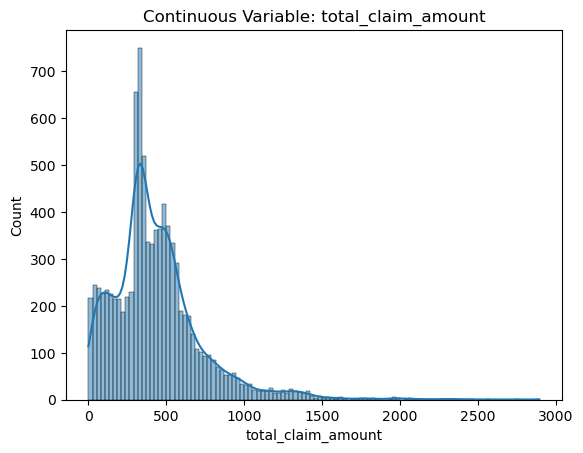

In [20]:
def plot_continuous(dataframe):
    
    for column in continuous_df.columns:
        sns.histplot(data=continuous_df, x=column, kde=True)
        plt.title(f'Continuous Variable: {column}')
        plt.show()

plot_continuous(continuous_df)

### 9. Comment what you can see in the plots.


### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)


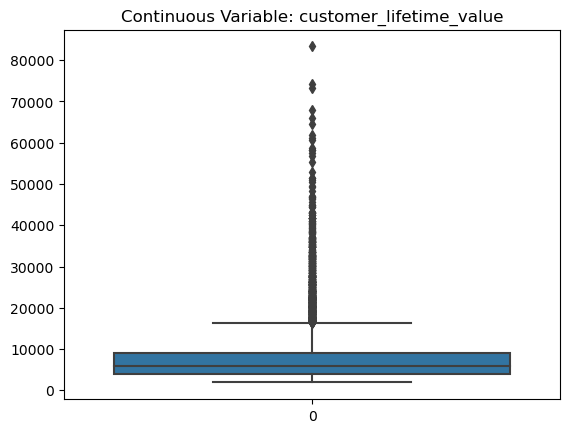

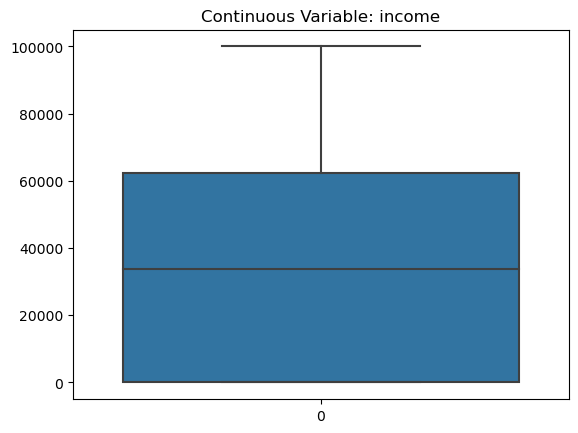

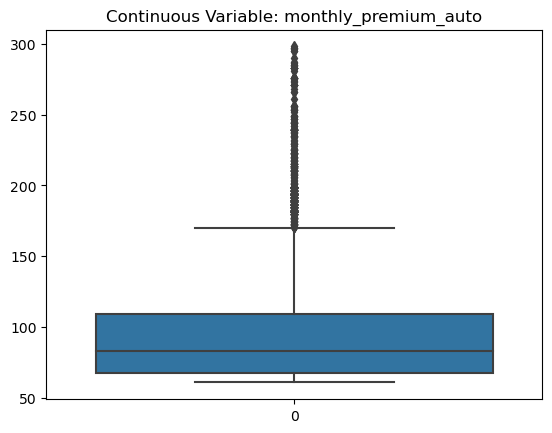

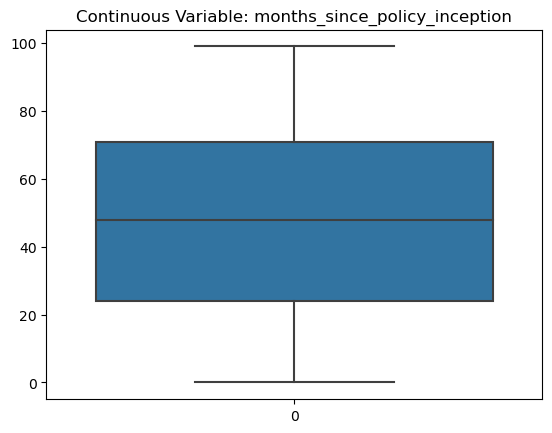

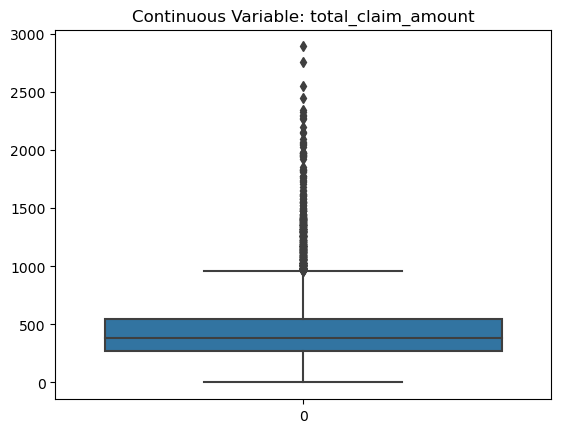

In [21]:
def boxplot_continuous(dataframe):
    
    for column in continuous_df.columns:
        sns.boxplot(data=continuous_df[column])
        plt.title(f'Continuous Variable: {column}')
        plt.show()

boxplot_continuous(continuous_df)


### 11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.


In [22]:
# The following variables have outliners:
# customer_lifetime_value
# monthly_premium_auto
# total_claim_amount

In [23]:
def count_outliers_iqr(dataframe, column_name):
    # Calculate the IQR
    q1 = np.nanpercentile(dataframe[column_name], 25)
    q3 = np.nanpercentile(dataframe[column_name], 75)
    iqr = q3 - q1
    
    # Calculate the upper limit for potential outliers
    upper_limit = q3 + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = dataframe[dataframe[column_name] > upper_limit]
    
    # Count the number of potential outliers
    num_outliers = len(potential_outliers)
    
    return num_outliers, upper_limit 

In [24]:
outliers_lifetime_value = count_outliers_iqr(continuous_df, 'customer_lifetime_value')
outliers_lifetime_value 

(817, 16414.039911750002)

In [25]:
outliers_monthly_premium_auto = count_outliers_iqr(continuous_df, 'monthly_premium_auto')
outliers_monthly_premium_auto

(430, 170.5)

In [26]:
outliers_claim_amount = count_outliers_iqr(continuous_df, 'total_claim_amount')
outliers_claim_amount 

(453, 960.3997301249999)

Given the significant quantity of data points labeled as "outliers," it raises doubts about their true outlier status. Consequently, I've made the decision to keep them. It's also essential to note that we cannot exclude any values from our target dataset.
What I can do is identify the top three maximum values in customer_lifetime_value, which indeed appear to be genuine outliers, and then proceed to remove them. I do it directly in the dataframe with the numerical variables. 

In [27]:
# outliers = _numerical_df_['customer_lifetime_value'].nlargest(4)
# outliers

In [28]:
# indices_outliers = _numerical_df_['customer_lifetime_value'].nlargest(3).index

In [29]:
# _numerical_df_ = _numerical_df_.drop(indices_outliers)
# sns.boxplot(y=_numerical_df_['customer_lifetime_value'])
# plt.show()

In [30]:
# _numerical_df_.reset_index(drop=True, inplace=True)

In [31]:
#Check
# _numerical_df_['customer_lifetime_value'].nlargest(3)

### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.


In [32]:
_numerical_df_.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

### 13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.


In [33]:
_numerical_df_.to_csv('numerical.csv', index=False)


# Lab | Cleaning categorical data

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values and decide what to do with them, do it now.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

### 2. Find all of the categorical data. Save it in a categorical_df variable.


In [34]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [35]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head(5)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 3. Check for NaN values and decide what to do with them, do it now.


In [36]:
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

### 4. Check all unique values of columns.


In [37]:
categorical_df = categorical_df.drop(['customer'], axis=1)

In [38]:
unique_values_dict = {}

for column in categorical_df.columns:
    unique_values = categorical_df[column].unique()
    unique_values_dict[column] = unique_values

# Display unique values in a neat tabular format
for column, values in unique_values_dict.items():
    print(f"Unique values in '{column}':")
    for value in values:
        print(f"  - {value}")
    print()  # Add an empty line for separation

Unique values in 'state':
  - Washington
  - Arizona
  - Nevada
  - California
  - Oregon

Unique values in 'response':
  - No
  - Yes

Unique values in 'coverage':
  - Basic
  - Extended
  - Premium

Unique values in 'education':
  - Bachelor
  - College
  - Master
  - High School or Below
  - Doctor

Unique values in 'employmentstatus':
  - Employed
  - Unemployed
  - Medical Leave
  - Disabled
  - Retired

Unique values in 'gender':
  - F
  - M

Unique values in 'location_code':
  - Suburban
  - Rural
  - Urban

Unique values in 'marital_status':
  - Married
  - Single
  - Divorced

Unique values in 'policy_type':
  - Corporate Auto
  - Personal Auto
  - Special Auto

Unique values in 'policy':
  - Corporate L3
  - Personal L3
  - Corporate L2
  - Personal L1
  - Special L2
  - Corporate L1
  - Personal L2
  - Special L1
  - Special L3

Unique values in 'renew_offer_type':
  - Offer1
  - Offer3
  - Offer2
  - Offer4

Unique values in 'sales_channel':
  - Agent
  - Call Center
  - We

### 5. Check dtypes. Do they all make sense as categorical data?

No, the 'customer' variable is neither categorical nor will be useful for our model. I have decided to drop it for this reason

### 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [39]:
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].astype(str)

# Now, you can clean the values using .str.replace
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace(r'\D', '', regex=True).astype(int)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,3,Branch,Four-Door Car,Large


In [40]:
categorical_df['policy'] = categorical_df['policy'].astype(str)
categorical_df['policy'] = categorical_df['policy'].str.extract('(\d+)').astype(int)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [41]:
category_counts = {}

for column in categorical_df.columns:
    # Count the occurrences of each unique value in the column
    category_counts[column] = categorical_df[column].value_counts()

# Display the category counts in a neat tabular format
for column, counts in category_counts.items():
    print(f"Category counts in '{column}':")
    print(counts)
    print()  # Add an empty line for separation

Category counts in 'state':
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

Category counts in 'response':
No     7826
Yes    1308
Name: response, dtype: int64

Category counts in 'coverage':
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Category counts in 'education':
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Category counts in 'employmentstatus':
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

Category counts in 'gender':
F    4658
M    4476
Name: gender, dtype: int64

Category counts in 'location_code':
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Category counts in 'marital_status':
Married     5298
Singl

## Insights into categorical data
column | decision
-------|---------
state | only 5 - leave as is
response | imbalanced make 1,0
coverage| ordinal encode
education | combine master & dr.
employment status | smallest 3 into other
gender | 1hot encode
location | ordinal encode as is
marital | 1hot encode as is
policy type | combine corporate/special
policy | drop column
renew offer | encode as is
sales channel | 1hot encode as is
vehicle class | 1hot combine luxury/sports
vehicle size | ordinal encode

In [42]:
categorical_df['vehicle_class'].unique()
categorical_df['vehicle_class'].replace({"Sports Car":"Luxury" , "Luxury SUV":"Luxury" ,"Luxury Car":"Luxury" }, inplace=True)
(categorical_df["vehicle_class"].unique())

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [43]:
categorical_df["coverage"] = categorical_df["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [44]:
categorical_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [45]:
categorical_df["employmentstatus"] = categorical_df["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})


In [46]:
categorical_df["education"] =categorical_df["education"].map({"High School or Below" : 0, "Bachelor" : .5, "College":.5, "Master" : 1, "Doctor":1})


In [47]:
categorical_df["location_code"] =categorical_df["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})

In [48]:
categorical_df["vehicle_size"] =categorical_df["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [49]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,3,1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,3,3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,3,1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,2,1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,1,1,Agent,Four-Door Car,0.5


### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [50]:
# I have already completed this task. 
# I made the decision to retain all the information within the 'policy' column but cleaned it to only preserve the numerical part. 
# This choice was made because we already have the other relevant information stored in the 'policy_type' column

### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [51]:
# Already done

### 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [52]:
categorical_df.to_csv('categorical.csv', index=False)

In [53]:
# I only retain the object-type columns, it not include the 'effective_to_date' variable in either the numerical or categorical DataFrame.
# For now I just write this comment for not forget it

# Lab | Feature extraction

1. Open the categorical dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Make any changes you feel are necessary.
5. Plot time variable. Can you extract something from it?
6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

### 1. Open the categorical dataframe we created before.

In [54]:
categorical_df = pd.read_csv('categorical.csv')


### 2.Plot all the categorical variables with the proper plot. What can you see?

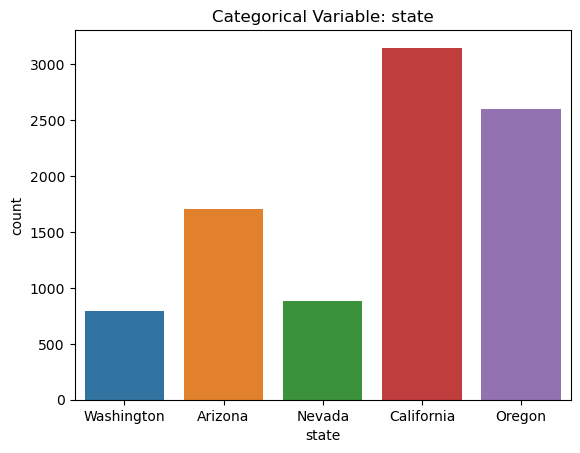

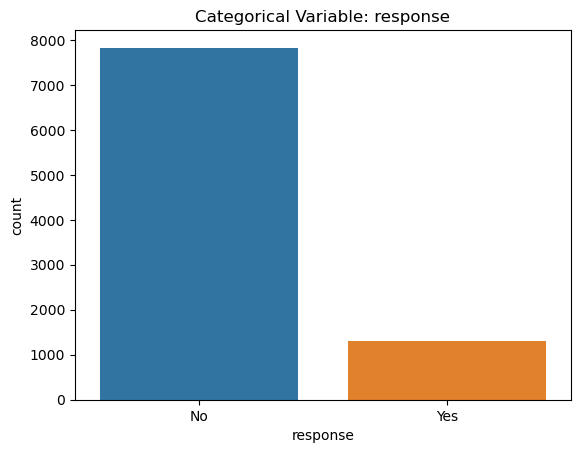

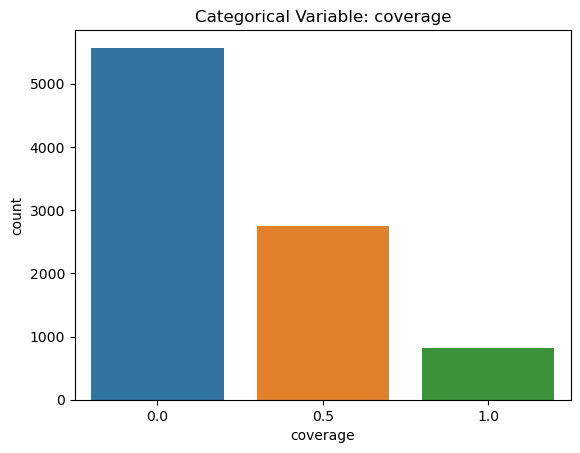

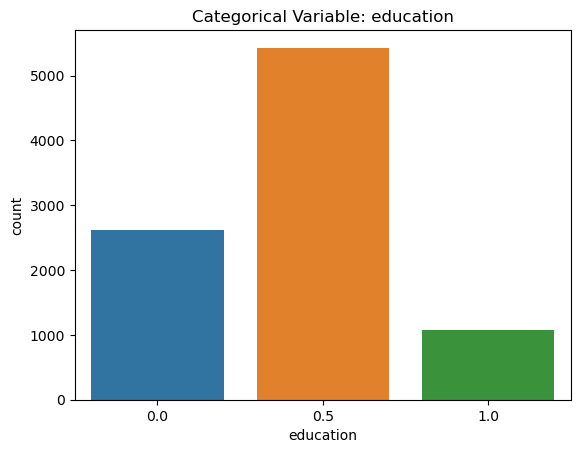

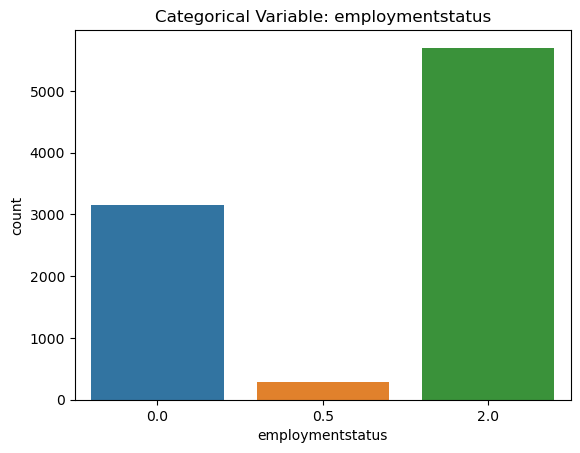

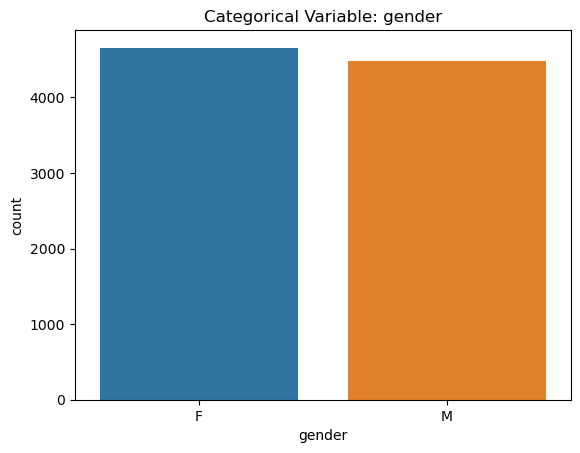

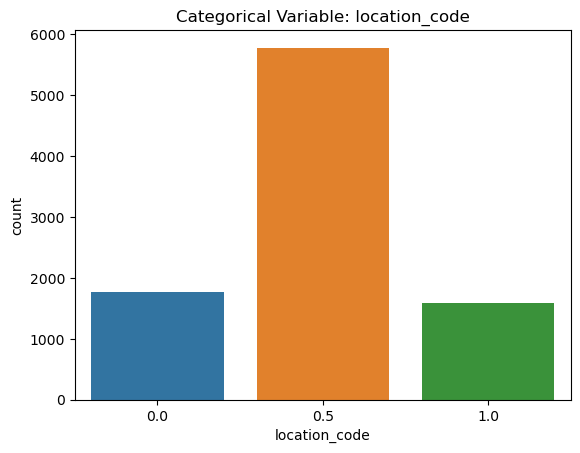

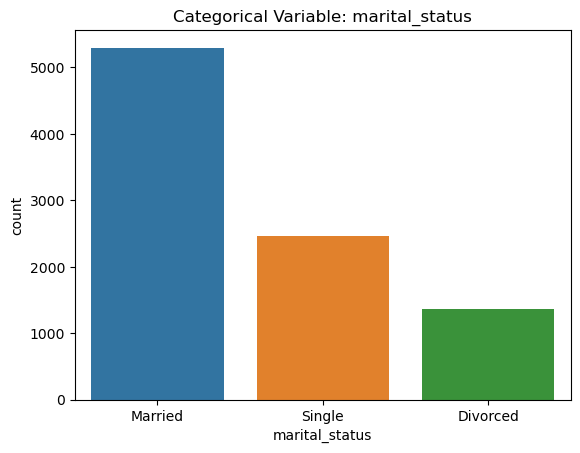

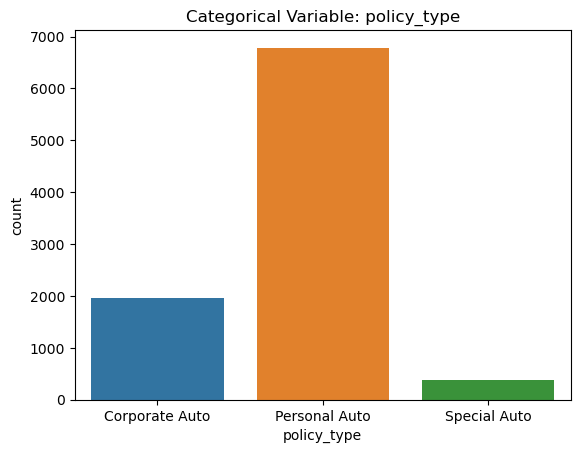

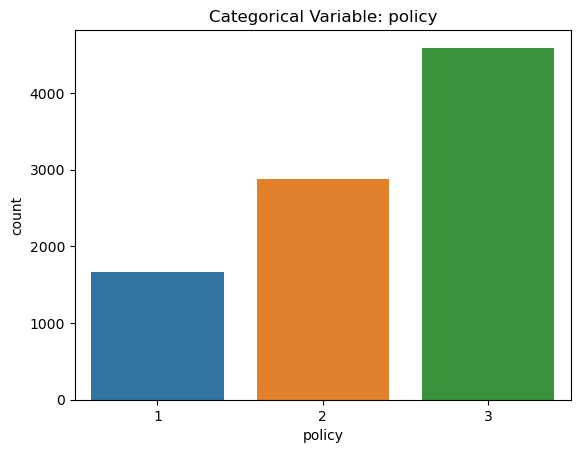

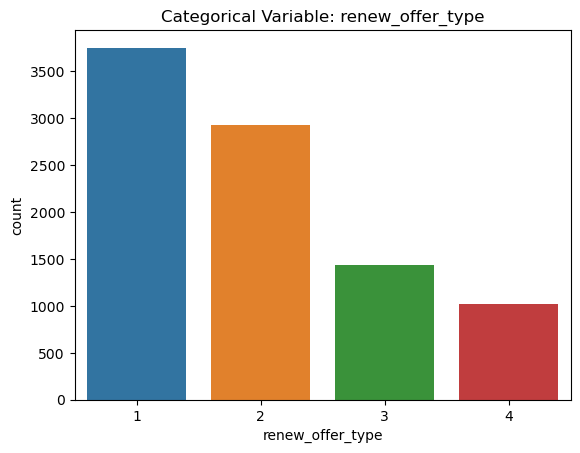

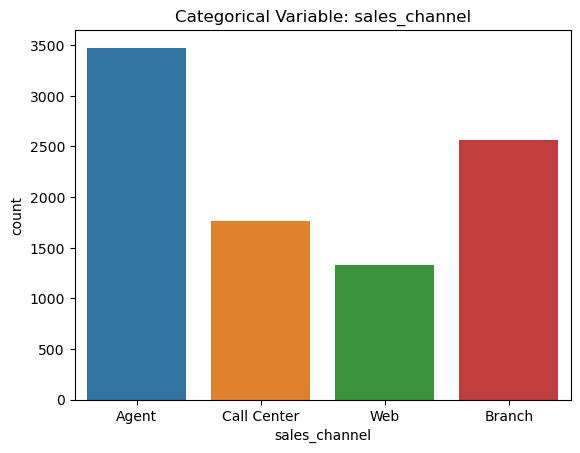

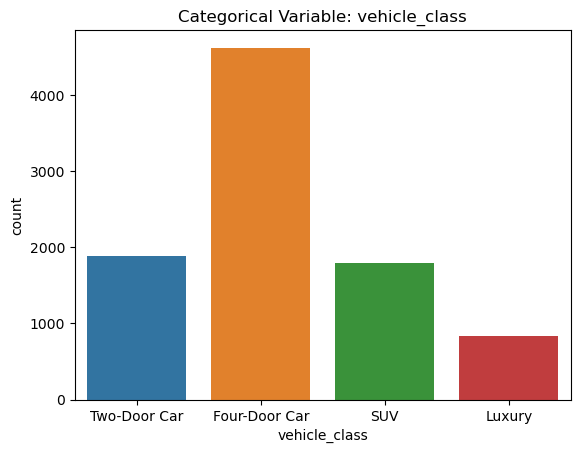

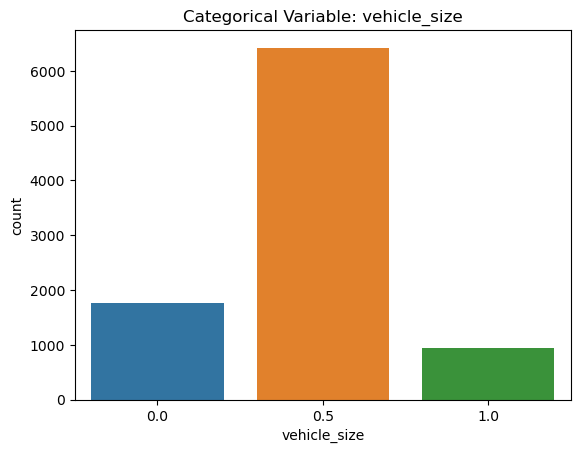

In [55]:
def plot_cat(dataframe):
    
    for column in categorical_df.columns:
        sns.countplot(data=categorical_df, x=column)
        plt.title(f'Categorical Variable: {column}')
        plt.show()
        
plot_cat(categorical_df) 

In [56]:
# Maybe I can combine some of the unique values in some categorical variables: Education?

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [57]:
# Already done

### 4. Make any changes you feel are necessary.

In [58]:
# Already done

### 5. Plot time variable. Can you extract something from it?

In [59]:
# Add the "effective_to_date" column to categorical_df
categorical_df['effective_to_date'] = customer_df['effective_to_date']

# Now, categorical_df contains the "effective_to_date" column
categorical_df.head(5)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,3,1,Agent,Two-Door Car,0.5,2011-02-24
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,3,3,Agent,Four-Door Car,0.5,2011-01-31
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,3,1,Agent,Two-Door Car,0.5,2011-02-19
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,2,1,Call Center,SUV,0.5,2011-01-20
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,1,1,Agent,Four-Door Car,0.5,2011-02-03


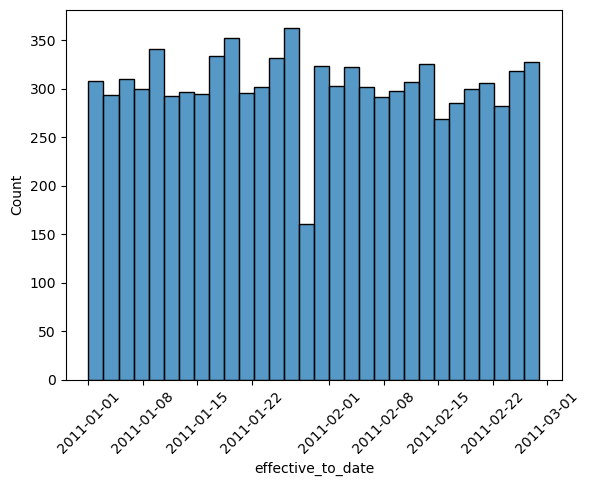

In [60]:
sns.histplot(data=categorical_df, x='effective_to_date', bins=30)
plt.xticks(rotation=45)
plt.show()

### 6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [61]:
# Extract day, week, and month as integers into new columns
# categorical_df['day_of_month'] = categorical_df['effective_to_date'].dt.day
categorical_df['week_of_year'] = categorical_df['effective_to_date'].dt.isocalendar().week
# categorical_df['month'] = categorical_df['effective_to_date'].dt.month
# categorical_df['year'] = categorical_df['effective_to_date'].dt.year

categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,week_of_year
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,3,1,Agent,Two-Door Car,0.5,2011-02-24,8
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,3,3,Agent,Four-Door Car,0.5,2011-01-31,5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,3,1,Agent,Two-Door Car,0.5,2011-02-19,7
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,2,1,Call Center,SUV,0.5,2011-01-20,3
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,1,1,Agent,Four-Door Car,0.5,2011-02-03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0.0,0.5,2.0,M,1.0,Married,Personal Auto,1,2,Web,Four-Door Car,0.5,2011-02-10,6
9130,California,Yes,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,0.5,2011-02-12,6
9131,California,No,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,2,1,Branch,Four-Door Car,0.5,2011-02-06,5
9132,California,No,0.5,0.5,2.0,M,0.5,Married,Personal Auto,2,3,Branch,Four-Door Car,1.0,2011-02-03,5


# Lab | Comparing regression models

Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check LinearRegressor and KNeighborsRegressor.

9. You can check also the MLPRegressor for this task!

10. Check and discuss the results.

In [62]:
data = pd.concat([categorical_df, _numerical_df_], axis=1)
data

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,...,effective_to_date,week_of_year,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,3,...,2011-02-24,8,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,3,...,2011-01-31,5,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,3,...,2011-02-19,7,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,2,...,2011-01-20,3,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,1,...,2011-02-03,5,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0.0,0.5,2.0,M,1.0,Married,Personal Auto,1,...,2011-02-10,6,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,3,...,2011-02-12,6,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,2,...,2011-02-06,5,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,0.5,0.5,2.0,M,0.5,Married,Personal Auto,2,...,2011-02-03,5,7524.442436,21941,96,34,3,0,3,691.200000


In [63]:
# X/y split (feature/target) : X, y
# Need to X-y split and train-test-split BEFORE  apply transformations, 
y = data['total_claim_amount']
X = data.drop('total_claim_amount', axis=1)

In [64]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [65]:
# train/test split : X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

### 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)


In [66]:
# num/cat split : X_train_num, X_train_cat, X_test_num, X_test_cat
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

### 3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.


In [67]:
from sklearn.preprocessing import MinMaxScaler

# Scaling data
# tranforming training data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

# tranforming testing data: we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)
X_test_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,1.0,0.5,0.5,1.000000,0.5,0.058824,0.087224,0.281190,0.223629,0.171429,0.272727,0.0,0.25
1,0.0,0.5,1.0,0.5,1.0,0.333333,0.0,0.000000,0.007993,0.473645,0.016878,0.171429,0.353535,0.0,0.00
2,0.0,0.5,1.0,0.5,1.0,0.333333,0.5,0.039216,0.027918,0.367373,0.189873,0.371429,0.181818,0.2,0.00
3,0.0,0.5,0.0,0.5,0.5,0.333333,0.5,0.078431,0.010122,0.175829,0.042194,0.828571,0.707071,0.0,0.00
4,0.0,0.5,0.0,0.5,1.0,0.666667,0.5,0.058824,0.034832,0.000000,0.025316,0.200000,0.757576,0.0,0.50


### 4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)


In [68]:
X_train_cat

,state,response,gender,marital_status,policy_type,sales_channel,vehicle_class
5175,Oregon,No,F,Married,Personal Auto,Agent,Four-Door Car
725,Arizona,No,M,Married,Personal Auto,Agent,Four-Door Car
352,California,No,F,Single,Corporate Auto,Call Center,Four-Door Car
4455,Washington,No,F,Single,Personal Auto,Branch,SUV
7362,Oregon,No,F,Married,Personal Auto,Web,Four-Door Car
...,...,...,...,...,...,...,...
5593,California,No,M,Divorced,Corporate Auto,Call Center,Luxury
3239,Oregon,No,F,Married,Personal Auto,Web,Luxury
860,Arizona,Yes,F,Divorced,Personal Auto,Call Center,SUV
8381,Oregon,Yes,M,Married,Personal Auto,Web,Luxury


In [69]:
# Encoding data

X_train_cat = pd.get_dummies(X_train_cat, 
                             columns=['state', 'response', 'gender','marital_status', 'policy_type',  'sales_channel', 'vehicle_class'],
                             drop_first=True)
X_train_cat

# X TEST CAT
X_test_cat  = pd.get_dummies(X_test_cat, 
                            columns=['state', 'response', 'gender','marital_status', 'policy_type',  'sales_channel', 'vehicle_class'],
                            drop_first=True)

In [70]:
X_train_cat

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
5175,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
725,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
352,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4455,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0
7362,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3239,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
860,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
8381,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0


In [71]:
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed
X_train_transformed.shape

(7307, 31)

In [72]:
list(X_train_cat.columns)==list(X_test_cat.columns)

True

In [73]:
y_train.shape

(7307,)

In [74]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [75]:
X_test_transformed.shape

(1827, 31)

In [76]:
y_test.shape

(1827,)

### 5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


In [77]:
# Already done

### 6. Try a simple linear regression with all the data to see whether we are getting good results.


In [78]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)

LinearRegression()

In [79]:
from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error
predictions = lm.predict(X_train_transformed)
r2_score(y_train, predictions)

0.6224977051115393

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

predictions_train = lm.predict(X_train_transformed)
r2_train = r2_score(y_train, predictions_train)

predictions_test = lm.predict(X_test_transformed)
r2_test = r2_score(y_test, predictions_test)

mse = mean_squared_error(y_test, predictions_test)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, predictions_test)

# Imprimir resultados
print(f'R^2 Score (train): {r2_train:.4f}')
print(f'R^2 Score (test): {r2_test:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R^2 Score (train): 0.6225
R^2 Score (test): 0.6447
Mean Squared Error (MSE): 31779.0888
Root Mean Squared Error (RMSE): 178.2669
Mean Absolute Error (MAE): 132.2742


Training Data:
- R2-Score (Coefficient of Determination): 0.62
R2-Score ranges from 0 to 1, with 1 being the best. In this case, 0.62 indicates that the model explains 62% of the variance in the training data.
- Mean Squared Error (MSE): 30732.00
MSE measures the average squared difference between actual and predicted values. The lower the MSE, the better. In this case, 30732.00 suggests a moderate level of error.
- Root Mean Squared Error (RMSE): 175.31
RMSE is the square root of MSE and provides a measure of the spread of errors. A lower RMSE indicates better model performance. The model's predictions deviate, on average, by 175.31 units from the actual values in the training set.
- Mean Absolute Error (MAE): 127.67
MAE is the average absolute difference between actual and predicted values. It represents the average magnitude of errors. An MAE of 127.67 suggests that, on average, the model's predictions are off by this amount in the training set.

Test Data:
- R2-Score (Coefficient of Determination): 0.62
The test R2-Score of 0.62 indicates that the model explains 62% of the variance in the test data. It's slightly lower than the training R2-Score, which is expected.
- Mean Squared Error (MSE): 33571.52
The test MSE of 33571.52 is slightly higher than the training MSE, indicating a potentially higher level of error on the test set.
- Root Mean Squared Error (RMSE): 183.23
The test RMSE of 183.23 indicates the average magnitude of errors in the test set. It's higher than the training RMSE, suggesting that the model's predictions deviate, on average, by 183.23 units from the actual values in the test set.
- Mean Absolute Error (MAE): 135.27
The test MAE of 135.27 is slightly higher than the training MAE, indicating a slightly larger average magnitude of errors on the test set.

Overall Interpretation:
- The model performs reasonably well on both the training and test datasets, as indicated by the R2-Score, though there is a slight drop in performance on the test set, which is common.
- The MSE, RMSE, and MAE values provide insights into the magnitude of errors, and while they are not extremely high, there is room for improvement.

In [81]:
compare = pd.DataFrame({'actual':y_test, 'predicted': predictions_test})
compare

,actual,predicted
8262,547.200000,507.382844
3400,312.000000,252.704001
7077,580.091966,406.770482
2906,398.502948,383.481745
4690,747.458052,489.706910
...,...,...
4173,8.315904,104.872114
3341,204.953947,258.440978
3652,188.204234,338.396229
8892,39.579516,281.347853


### 7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


### 8. Use the function to check LinearRegressor and KNeighborsRegressor.


### 9. You can check also the MLPRegressor for this task!


### 10. Check and discuss the results.

In [82]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the models
models_to_try = [
    lm, KNeighborsRegressor(), MLPRegressor(random_state=1, max_iter=500),
    DecisionTreeRegressor(), RandomForestRegressor()
]

# Define a function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    scores = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)
    return scores

# Call the function and evaluate the models
scores = train_and_evaluate_models(models_to_try, X_train_transformed, y_train, X_test_transformed, y_test)

# Print the results in a different format
for model, score in zip(models_to_try, scores):
    model_name = model.__class__.__name__
    print(f'Model: {model_name}, R^2 Score: {score:.4f}')

C:\Users\laiag\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: LinearRegression, R^2 Score: 0.6447
Model: KNeighborsRegressor, R^2 Score: 0.5107
Model: MLPRegressor, R^2 Score: 0.8454
Model: DecisionTreeRegressor, R^2 Score: 0.6706
Model: RandomForestRegressor, R^2 Score: 0.8580
Wall time: 18 s


- LinearRegression
R^2 Score: 0.6447
Interpretation: The Linear Regression model explains approximately 64.47% of the variance in the target variable. This indicates a moderate level of explanatory power. The model provides a decent fit to the data.

- KNeighborsRegressor
R^2 Score: 0.5107
Interpretation: The KNeighborsRegressor model explains around 51.07% of the variance in the target variable. This suggests a lower level of explanatory power compared to Linear Regression. The model may be capturing patterns less effectively or might be sensitive to the choice of neighbors.

- MLPRegressor
R^2 Score: 0.8454
Interpretation: The MLPRegressor model performs very well, explaining approximately 84.54% of the variance. This indicates a high level of explanatory power, and the model fits the data very closely.

- DecisionTreeRegressor
R^2 Score: 0.6706
Interpretation: The DecisionTreeRegressor explains about 67.06% of the variance in the target variable. This suggests a good level of explanatory power, and the model captures a substantial portion of the underlying patterns in the data.

- RandomForestRegressor
R^2 Score: 0.8580
Interpretation: The RandomForestRegressor model performs exceptionally well, explaining approximately 85.80% of the variance. This indicates a high level of explanatory power, and the model fits the data very closely. Random Forest models often excel in capturing complex relationships in the data.


#### Overall Interpretation:
- Among the models evaluated, RandomForestRegressor and MLPRegressor stand out with the highest R^2 scores, indicating superior performance in explaining the variance in the target variable.
- LinearRegression and DecisionTreeRegressor also demonstrate good performance, providing a moderate to high level of explanatory power.
- KNeighborsRegressor shows a lower R^2 score
